In [1]:
import numpy as np
import pypolycontain as pp
np.set_printoptions(2)

/home/sadra/Dropbox (MIT)/pypolycontain/pypolycontain/conversions.py:164: UserWarning: Zonotope Vertex Enumeration:                       The number of generators 16 is very large.                       Resorting to ray shooting
  Resorting to ray shooting'%q)


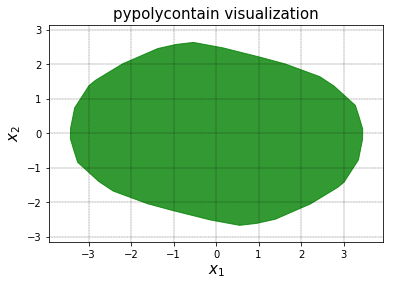

In [2]:
q_o,n=16,2
Z_o=pp.zonotope(x=np.zeros((n,1)),G=np.random.random((n,q_o))-0.5)
pp.visualize([Z_o])

In [3]:
# Z_i=pp.zonotope(x=np.zeros((n,1)),G=G)
import pydrake.solvers.mathematicalprogram as MP
# use SOCS solver
import pydrake.solvers.scs as SCS
mysolver=SCS.ScsSolver()

success


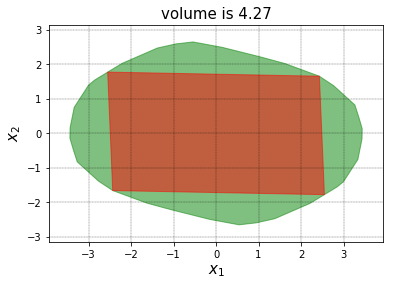

In [4]:
program=MP.MathematicalProgram()
G=program.NewSymmetricContinuousVariables(n,'X') 
program.AddPositiveSemidefiniteConstraint(G)
program.AddMaximizeLogDeterminantSymmetricMatrixCost(G)
Z_i=pp.zonotope(x=np.zeros((n,1)),G=G) 
pp.subset(program,Z_i,Z_o)
result=mysolver.Solve(program,None,None)
if result.is_success():
    print("success")
    G_n= result.GetSolution(G)
else:
    print("failure") 
Z_i_n=pp.zonotope(x=np.zeros((n,1)),G=G_n,color='red')
pp.visualize([Z_o,Z_i_n],alpha=0.5,title=r'volume is %0.0002f'%Z_i_n.volume())

success
volume is 4.299891940485216
success
volume is 4.351883436917287
success
volume is 4.463270648680089
success
volume is 4.611321501903778
success
volume is 4.613329347512757
success
volume is 4.61332916940087
success
volume is 4.613329574911156
success
volume is 4.613329365431474
success
volume is 4.613331091291962
success
volume is 4.61332561196923


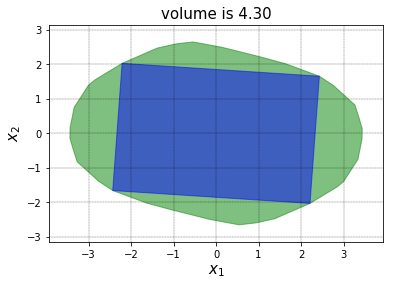

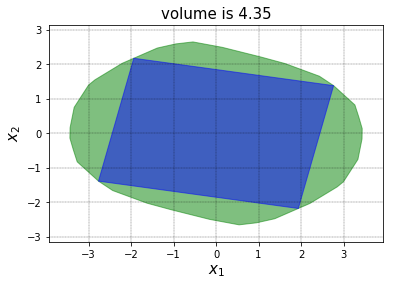

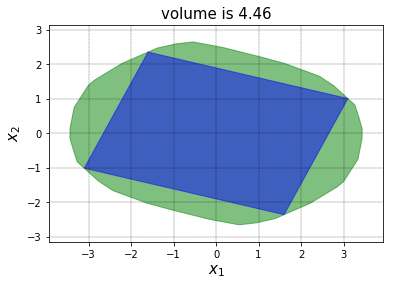

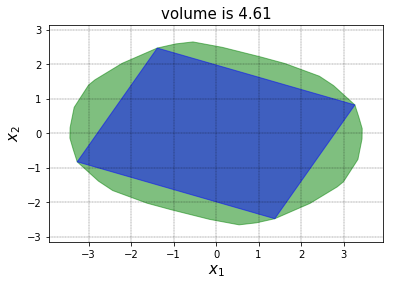

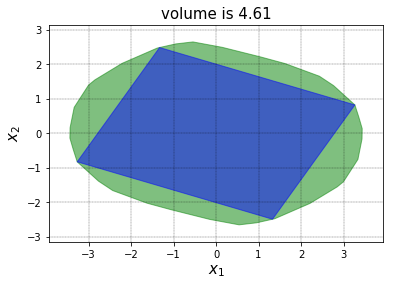

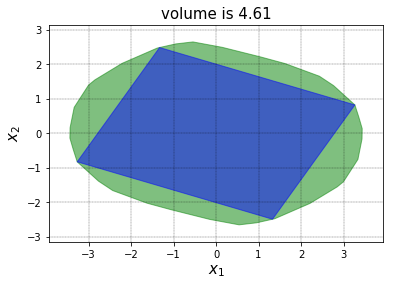

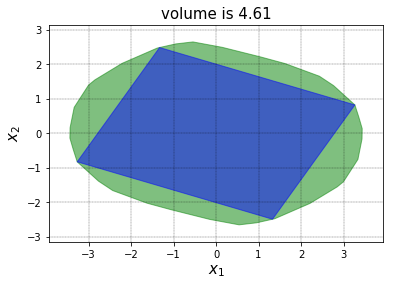

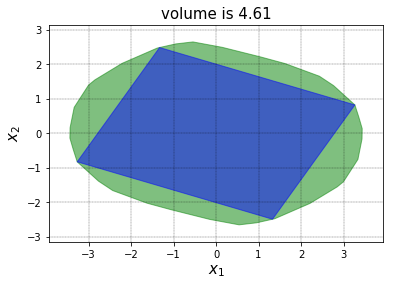

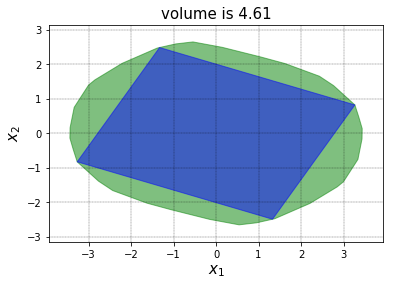

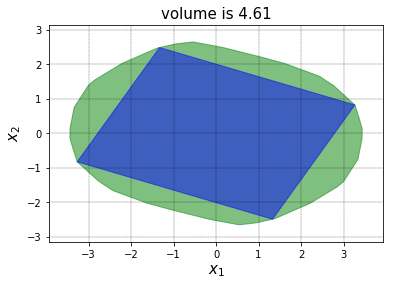

In [5]:
# G_n=np.hstack((G_n,np.zeros((2,1)) ))
X_n=np.zeros(G_n.shape)
for i in range(10):
    G_n=G_n+X_n
    V=pp.zonotope(G_n).volume_gradient()
    program=MP.MathematicalProgram()
    X=program.NewContinuousVariables(G_n.shape[0],G_n.shape[1],'X') 
    h=0.2
    program.AddBoundingBoxConstraint(-h,h,X)
    program.AddLinearCost(-np.sum(np.multiply(X,V)))
    Z_i=pp.zonotope(x=np.zeros((n,1)),G=G_n+X) 
    pp.subset(program,Z_i,Z_o)
    result=mysolver.Solve(program,None,None)
    if result.is_success():
        print("success")
        X_n= result.GetSolution(X)
    else:
        print("failure") 
    Z_i_n=pp.zonotope(x=np.zeros((n,1)),G=G_n+X_n,color='blue')
    pp.visualize([Z_o,Z_i_n],alpha=0.5,title=r'volume is %0.0002f'%Z_i_n.volume())
    print("volume is",Z_i_n.volume())
    G_n=G_n+X_n

In [7]:
G_n

array([[ 2.3 ,  0.97],
       [-0.83,  1.66]])